In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn import utils
from tqdm.notebook import tqdm
import os

In [2]:
train_dir = 'C:/Users/Changhyun/Desktop/data/dogs-vs-cats/train'

def labeling(img):
    class_name = img.split('.')[0]
    if class_name == 'cat':
        return 0
    if class_name == 'dog':
        return 1

In [3]:
x_data = []
t_data = []

for name in os.listdir(train_dir):
    pass

for img in tqdm(os.listdir(train_dir),
                total=len(os.listdir(train_dir)),
                position=0,
                leave=True):
    label_data = labeling(img)
    img_path = os.path.join(train_dir, img)
    
    img_data = cv.resize(cv.imread(img_path, cv.IMREAD_GRAYSCALE), (80,80))
    
    t_data.append(label_data)
    x_data.append(img_data.ravel())
    

  0%|          | 0/25000 [00:00<?, ?it/s]

In [5]:
t_df = pd.DataFrame({
    'label' : t_data
})
t_df.head()

,label
0,0
1,0
2,0
3,0
4,0


In [6]:
x_df = pd.DataFrame(x_data)
x_df

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,-87,-82,-76,-72,-68,-65,-60,-58,-55,-53,...,3,3,3,3,2,2,2,2,2,2
1,43,43,58,45,35,28,40,52,37,41,...,38,39,44,53,59,57,70,71,47,33
2,42,38,45,46,58,57,54,59,48,51,...,88,126,-100,-91,-119,-121,-107,-94,-85,-102
3,-36,-32,-31,-26,-33,-28,-26,-31,-28,-29,...,-20,-24,-28,-52,-52,-53,-40,-35,-44,-43
4,114,120,115,88,96,-117,127,-71,-126,-60,...,105,101,91,95,92,97,120,89,96,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-116,-113,-112,-110,-109,-108,-108,-107,-106,-104,...,-92,-92,-92,-91,-89,-90,-88,-88,-88,-87
24996,106,78,112,98,120,57,107,76,71,61,...,79,84,101,91,95,81,79,75,97,74
24997,35,36,63,69,41,51,48,47,44,64,...,-126,119,-120,-117,98,83,113,96,114,-82
24998,-1,-7,-19,-33,-54,-89,121,72,61,72,...,114,97,109,115,104,103,125,110,109,120


In [7]:
df = pd.merge(t_df, x_df, left_index=True, right_index=True)
df

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,-87,-82,-76,-72,-68,-65,-60,-58,-55,...,3,3,3,3,2,2,2,2,2,2
1,0,43,43,58,45,35,28,40,52,37,...,38,39,44,53,59,57,70,71,47,33
2,0,42,38,45,46,58,57,54,59,48,...,88,126,-100,-91,-119,-121,-107,-94,-85,-102
3,0,-36,-32,-31,-26,-33,-28,-26,-31,-28,...,-20,-24,-28,-52,-52,-53,-40,-35,-44,-43
4,0,114,120,115,88,96,-117,127,-71,-126,...,105,101,91,95,92,97,120,89,96,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,-116,-113,-112,-110,-109,-108,-108,-107,-106,...,-92,-92,-92,-91,-89,-90,-88,-88,-88,-87
24996,1,106,78,112,98,120,57,107,76,71,...,79,84,101,91,95,81,79,75,97,74
24997,1,35,36,63,69,41,51,48,47,44,...,-126,119,-120,-117,98,83,113,96,114,-82
24998,1,-1,-7,-19,-33,-54,-89,121,72,61,...,114,97,109,115,104,103,125,110,109,120


In [8]:
shuffle_df = utils.shuffle(df)
shuffle_df

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
22995,1,-31,-22,-26,-22,-20,-18,-20,-21,-14,...,98,100,65,55,48,-123,75,104,40,51
23350,1,-128,-4,-4,-5,-56,-49,-40,110,-77,...,-110,-110,-120,113,111,-111,-111,-113,-112,-114
24208,1,-80,-80,-85,-90,-92,-95,-99,-102,-106,...,58,58,54,55,58,51,57,61,64,61
19548,1,113,-86,-118,-122,123,-93,-110,-108,-125,...,-25,-25,-20,-22,-21,-22,-18,-22,-27,-21
16973,1,-10,-1,-3,-7,-4,-6,-4,-4,-5,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0,81,69,-110,-122,102,-120,73,75,-107,...,-104,116,-118,-83,-78,-74,-70,-71,-83,-81
13929,1,60,106,52,66,-122,119,92,94,117,...,28,25,28,38,54,52,35,43,19,21
15241,1,-27,-1,-4,-11,-33,-5,-5,-8,-12,...,-83,-58,-42,-24,-14,-5,-5,-3,-1,-2
11438,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,18,17,15,11,3,6,10,7,48,24


In [ ]:
shuffle_df.to_csv('C:/Users/Changhyun/Desktop/data/dogs-vs-cats/train.csv', index=False)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('C:/Users/Changhyun/Desktop/data/dogs-vs-cats/train.csv')
df
print(df.shape)

In [ ]:
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

In [ ]:
plt.imshow(x_data[155:156].reshape(80,80), cmap='gray')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(x_data, t_data, test_size=0.3, stratify=t_data)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [22]:
input_tensor = Input(shape=(80, 80, 1))
x = Conv2D(filters=64, kernel_size=3, padding='same')(input_tensor)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(256, activation='relu')(x)
output = Dense(1,activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 80, 80, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 80, 80, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 80, 80, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 40, 40, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 activation_7 (Activation)   (None, 40, 40, 128)       0         
                                                             

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(x_train_scaled.reshape(-1, 80, 80, 1), y_train.reshape(-1, 1),
                    batch_size=100, epochs=200, validation_split=0.3, verbose=1)

Epoch 1/200
123/123 [==============================] - 13s 51ms/step - loss: 0.6766 - accuracy: 0.5584 - val_loss: 0.6532 - val_accuracy: 0.6114
Epoch 2/200
123/123 [==============================] - 6s 45ms/step - loss: 0.6415 - accuracy: 0.6189 - val_loss: 0.6256 - val_accuracy: 0.6373
Epoch 3/200
123/123 [==============================] - 5s 45ms/step - loss: 0.6143 - accuracy: 0.6559 - val_loss: 0.6007 - val_accuracy: 0.6775
Epoch 4/200
123/123 [==============================] - 5s 44ms/step - loss: 0.5909 - accuracy: 0.6831 - val_loss: 0.5804 - val_accuracy: 0.6954
Epoch 5/200
123/123 [==============================] - 5s 45ms/step - loss: 0.5690 - accuracy: 0.7024 - val_loss: 0.5661 - val_accuracy: 0.7055
Epoch 6/200
123/123 [==============================] - 6s 45ms/step - loss: 0.5491 - accuracy: 0.7171 - val_loss: 0.5522 - val_accuracy: 0.7198
Epoch 7/200
123/123 [==============================] - 6s 47ms/step - loss: 0.5363 - accuracy: 0.7296 - val_loss: 0.5439 - val_accuracy

123/123 [==============================] - 6s 45ms/step - loss: 0.0805 - accuracy: 0.9703 - val_loss: 0.7331 - val_accuracy: 0.7562
Epoch 114/200
123/123 [==============================] - 5s 44ms/step - loss: 0.0847 - accuracy: 0.9697 - val_loss: 0.7221 - val_accuracy: 0.7583
Epoch 115/200
123/123 [==============================] - 5s 44ms/step - loss: 0.0797 - accuracy: 0.9703 - val_loss: 0.7055 - val_accuracy: 0.7653
Epoch 116/200
123/123 [==============================] - 5s 44ms/step - loss: 0.0740 - accuracy: 0.9719 - val_loss: 0.7305 - val_accuracy: 0.7600
Epoch 117/200
123/123 [==============================] - 5s 44ms/step - loss: 0.0675 - accuracy: 0.9758 - val_loss: 0.7739 - val_accuracy: 0.7587
Epoch 118/200
123/123 [==============================] - 6s 46ms/step - loss: 0.0719 - accuracy: 0.9737 - val_loss: 0.7537 - val_accuracy: 0.7613
Epoch 119/200
123/123 [==============================] - 6s 46ms/step - loss: 0.0664 - accuracy: 0.9770 - val_loss: 0.7664 - val_accuracy:

In [29]:
result = model.evaluate(x_test_scaled.reshape(-1, 80, 80, 1), y_test.reshape(-1, 1))
result

235/235 [==============================] - 2s 8ms/step - loss: 0.5032 - accuracy: 0.8800


[0.5031817555427551, 0.8799999952316284]

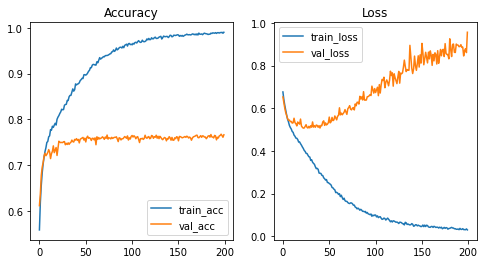

In [50]:
figure, axs = plt.subplots(figsize=(8, 4), nrows=1, ncols=2)

axs[0].plot(history.history['accuracy'], label='train_acc')
axs[0].plot(history.history['val_accuracy'], label='val_acc')
axs[0].set_title('Accuracy')

axs[1].plot(history.history['loss'], label='train_loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].set_title('Loss')

axs[0].legend()
axs[1].legend()
plt.show()

In [51]:
import os, shutil

original_dataset_dir = '../../data/dogs-vs-cats/train'

base_dir = '../../data/cat_dog_full'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train').replace('\\','/')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation').replace('\\','/')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test').replace('\\','/')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir,'cats').replace('\\','/')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs').replace('\\','/')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats').replace('\\','/')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs').replace('\\','/')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats').replace('\\','/')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs').replace('\\','/')
os.mkdir(test_dogs_dir)

## file 복사 ##
## 고양이와 멍멍이가 각각 12,500개
## train : 7,000 
## validation : 3,000
## test : 2,500 

fnames = ['cat.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '../../data/dogs-vs-cats/cat_dog_full/train'
val_dir = '../../data/dogs-vs-cats/cat_dog_full/validation'

train_data_gen = ImageDataGenerator(rescale=1/255.0)
validation_data_gen = ImageDataGenerator(rescale=1/255.0)

train_generator = train_data_gen.flow_from_directory(
    train_dir,    
    classes=['cats', 'dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_data_gen.flow_from_directory(
    val_dir,
    classes=['cats', 'dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [9]:
x_tr, y_tr = next(train_generator)
print(x_tr.shape, y_tr.shape)

(20, 150, 150, 3) (20,)


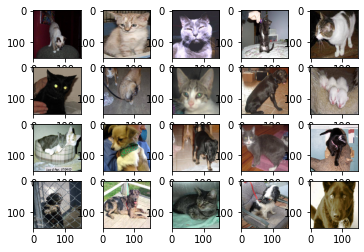

In [78]:
figure = plt.figure()
ax = []
for i in range(20):
    ax.append(figure.add_subplot(4,5,i+1))

for x_tr, y_tr in train_generator:
    for idx, img_data in enumerate(x_tr):
        ax[idx].imshow(img_data)        
    break
    
plt.show()

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Activation, Input, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

IMAGE_SIZE = 150
BATCH_SIZE = 8

In [3]:
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
x = Conv2D(filters=32, kernel_size=3)(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=32, kernel_size=3)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248  

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3))) # color!

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(rate=0.5))

model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

In [15]:
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_generator, steps_per_epoch=700, epochs=30, batch_size=20, validation_data=validation_generator, verbose=1)

Epoch 1/30
700/700 [==============================] - 48s 67ms/step - loss: 0.6857 - accuracy: 0.5553 - val_loss: 0.6356 - val_accuracy: 0.6202
Epoch 2/30
700/700 [==============================] - 47s 67ms/step - loss: 0.6493 - accuracy: 0.6142 - val_loss: 0.5983 - val_accuracy: 0.6835
Epoch 3/30
700/700 [==============================] - 44s 63ms/step - loss: 0.5615 - accuracy: 0.7109 - val_loss: 0.5270 - val_accuracy: 0.7385
Epoch 4/30
700/700 [==============================] - 43s 62ms/step - loss: 0.4806 - accuracy: 0.7669 - val_loss: 0.4863 - val_accuracy: 0.7633
Epoch 5/30
700/700 [==============================] - 43s 62ms/step - loss: 0.4116 - accuracy: 0.8116 - val_loss: 0.4636 - val_accuracy: 0.7865
Epoch 6/30
700/700 [==============================] - 43s 62ms/step - loss: 0.3366 - accuracy: 0.8541 - val_loss: 0.4796 - val_accuracy: 0.8055
Epoch 7/30
700/700 [==============================] - 43s 62ms/step - loss: 0.2523 - accuracy: 0.8924 - val_loss: 0.5616 - val_accuracy: